<a href="https://colab.research.google.com/github/williamsdoug/skin_lesion_ml/blob/master/Explore%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import *
import pandas as pd
import collections
import math
import csv

In [2]:
import random
random.seed(1234)
import numpy as np
np.random.seed(1234)
import torch
torch.manual_seed(1234)

## Code

## Config

In [5]:
PATH = Path()
images = PATH / 'data' / 'chest_xray'

In [8]:
images.ls()

[WindowsPath('data/chest_xray/test'),
 WindowsPath('data/chest_xray/train'),
 WindowsPath('data/chest_xray/val')]

In [17]:
(images/'train').ls()

[WindowsPath('data/chest_xray/train/NORMAL'),
 WindowsPath('data/chest_xray/train/PNEUMONIA')]

In [19]:
(images/'train'/'NORMAL').ls()[:10]

[WindowsPath('data/chest_xray/train/NORMAL/IM-0115-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0117-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0119-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0122-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0125-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0127-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0128-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0129-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0131-0001.jpeg'),
 WindowsPath('data/chest_xray/train/NORMAL/IM-0133-0001.jpeg')]

## Show Sample Image

In [12]:
fn = (images/'train'/'NORMAL').ls()[0]

In [22]:
img = open_image(fn)
print(img.shape)

torch.Size([3, 1858, 2090])


In [30]:
siz = np.array(img.shape[1:])
sizes = []
for i in range(5):
    siz = siz // 2
    sizes.append(siz.tolist())
sizes

[[929, 1045], [464, 522], [232, 261], [116, 130], [58, 65]]

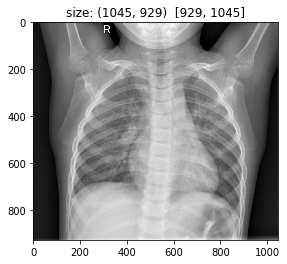

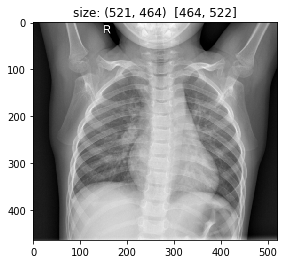

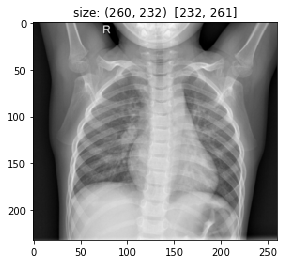

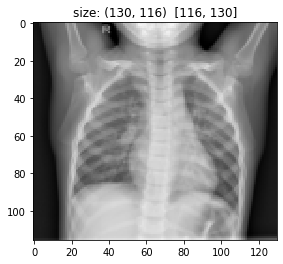

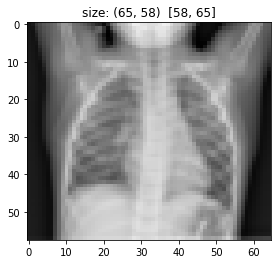

In [53]:
img = PIL.Image.open(fn)
for size in sizes:
    targ_sz = resize_to(img, size[0], use_min=True)
    img2 = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')

    plt.title(f'size: {img2.size}  {size}')
    plt.imshow(img2)
    plt.show()

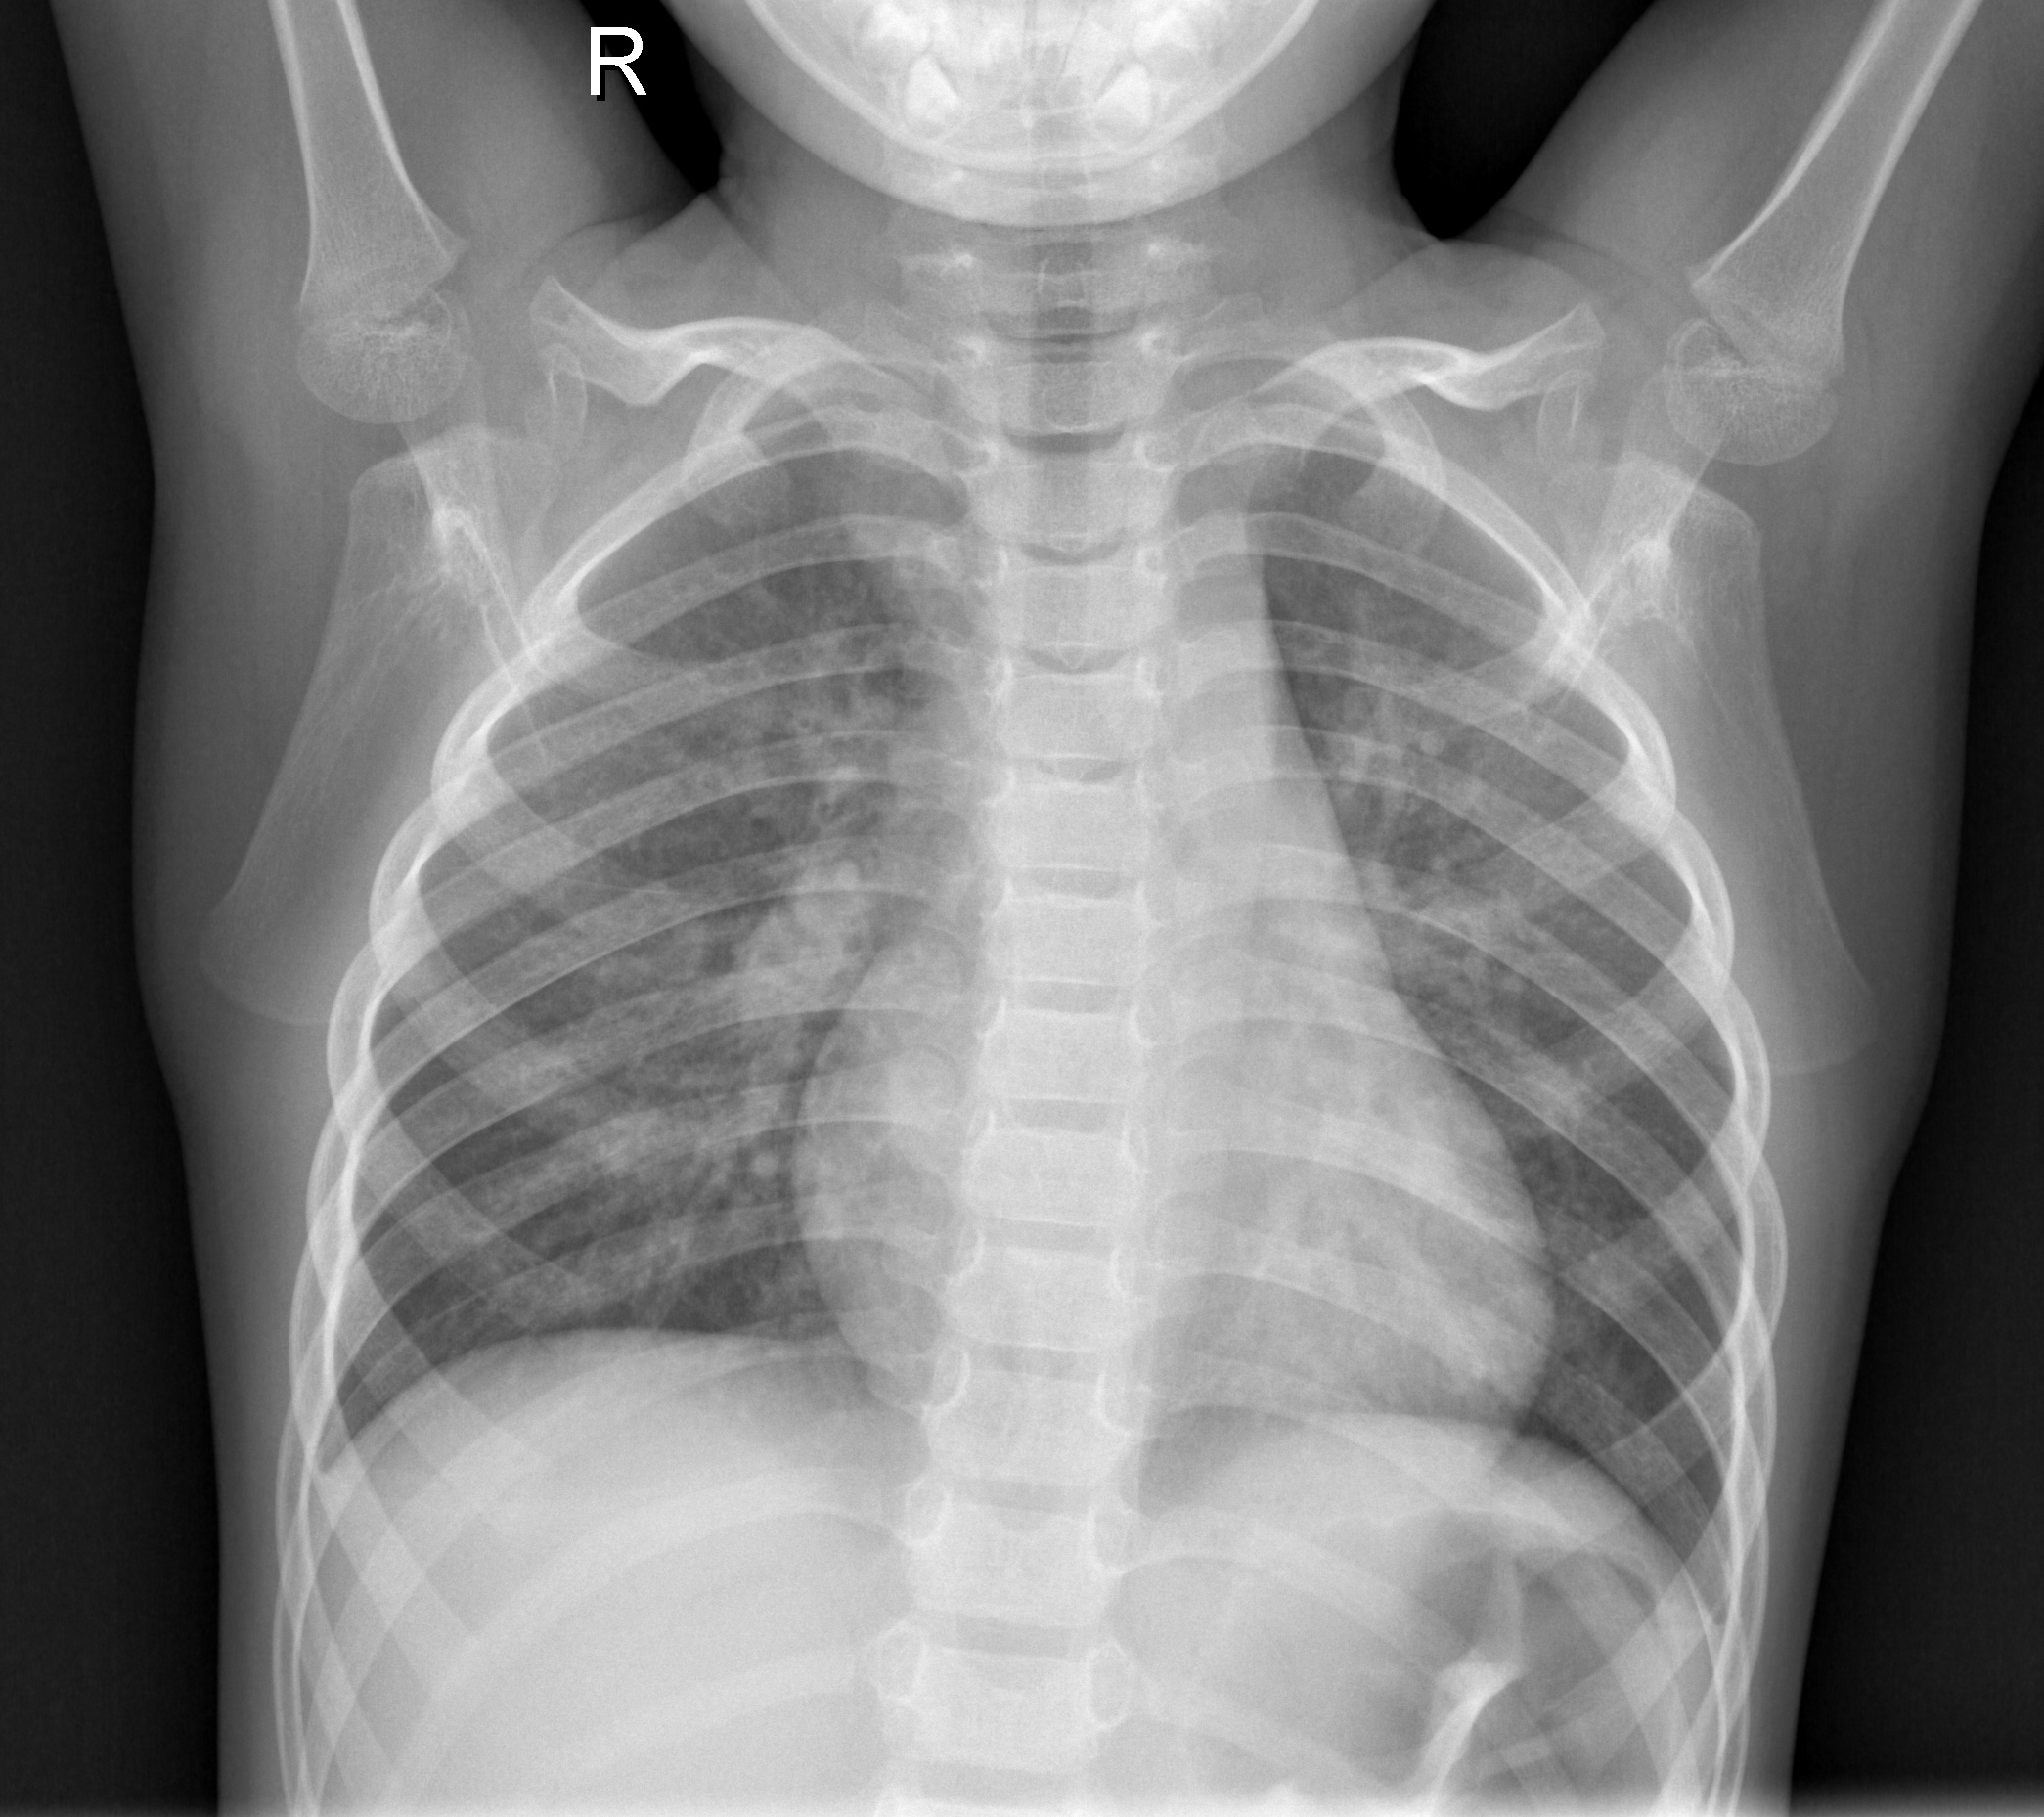

In [52]:
img